## ImageNet 기반 VGG16 체험

In [1]:
import cv2
from tensorflow import keras
VGG16 = keras.applications.vgg16.VGG16
img_to_array = keras.preprocessing.image.img_to_array
preprocess_input = keras.applications.vgg16.preprocess_input
decode_predictions = keras.applications.vgg16.decode_predictions

In [2]:
model = VGG16(weights='imagenet')

I0000 00:00:1747630921.379013   39956 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747630921.419027   39956 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747630921.419382   39956 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747630921.420682   39956 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


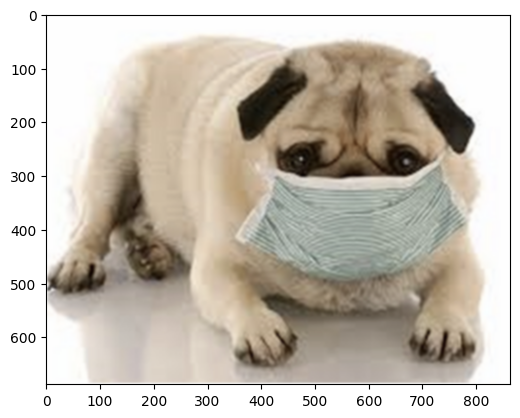

In [3]:
import matplotlib.pyplot as plt

image = cv2.imread('../data/dog.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
image = cv2.resize(image, dsize=(224,224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0],image.shape[1],image.shape[2]))
image = preprocess_input(image)

In [5]:
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s (%.2f%%)" % (label[1], label[2]*100))

I0000 00:00:1747632014.001946   40235 service.cc:146] XLA service 0x766a1c00bed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747632014.001984   40235 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-05-19 14:20:14.009255: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-19 14:20:14.059185: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
pug (82.43%)


I0000 00:00:1747632016.084314   40235 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [6]:
decode_predictions(yhat)

[[('n02110958', 'pug', 0.8243443),
  ('n03803284', 'muzzle', 0.06233574),
  ('n02099712', 'Labrador_retriever', 0.029677255),
  ('n02104029', 'kuvasz', 0.023605755),
  ('n02091467', 'Norwegian_elkhound', 0.0056609116)]]

## Dogs vs Cats 데이터셋으로 판단

In [19]:
import os

path = "../data/dogs-vs-cats/train/cat/"
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

In [20]:
import random
import matplotlib.image as mpimg

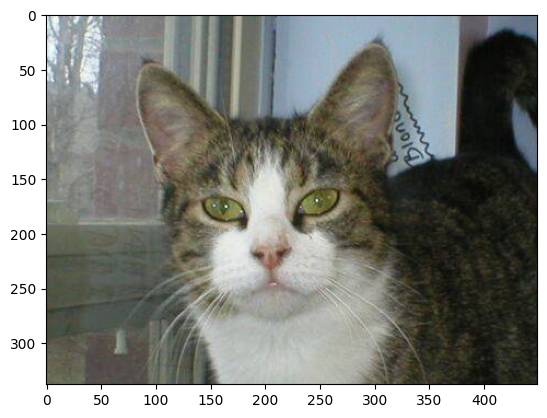

In [21]:
image = mpimg.imread(path + full_names[0])
plt.imshow(image)
plt.show()

In [22]:
image = cv2.resize(image, dsize=(224,224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0],image.shape[1],image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s (%.2f%%)" % (label[1], label[2]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
tabby (62.54%)


In [17]:
def resize_and_preprocess_vgg(image):
    image = cv2.resize(image, dsize=(224,224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0],image.shape[1],image.shape[2]))
    return preprocess_input(image)

def predict_vgg(model, image):
    yhat = model.predict(image)
    label = decode_predictions(yhat)
    return label[0][0][1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


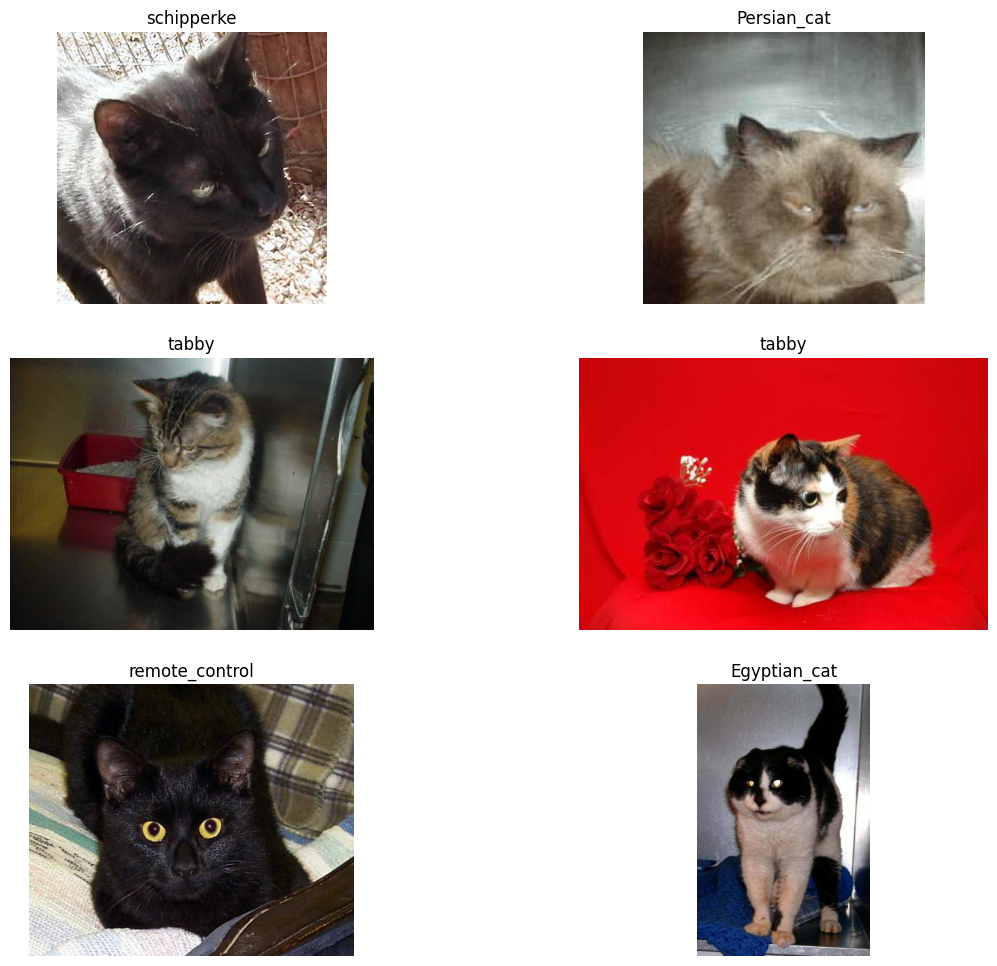

In [24]:
plt.figure(figsize=(14,12))
idx = 1
for each in random.choices(full_names, k=6):
    image = mpimg.imread(path + each)
    plt.subplot(3, 2, idx)
    idx += 1
    plt.imshow(image)

    image = resize_and_preprocess_vgg(image)
    result = predict_vgg(model, image)

    plt.title(result)
    plt.axis('off')

plt.show()